# Dimensionality Reduction

## PCA 

PCA (Ana Bileşen Analizi), şu ana kadar en popüler boyut indirgeme algoritmasıdır. Önce veriye en yakın olan hiperdüzlemi belirler ve ardından veriyi buna projeler.

Varyansı Korumak Eğitim setini daha düşük boyutlu bir hiperdüzleme yansıtabilmeden önce, önce doğru hiperdüzlemi seçmeniz gerekir. Örneğin, basit bir 2B veri kümesi alttaki sekilin sol tarafında gösterilmiştir ve üç farklı eksen (yani 1B hiperdüzlem) ile birlikte verilmiştir. Sağ tarafta ise veri kümesinin bu eksenlerin her birine yansıtılmasının sonucu gösterilmektedir. Gördüğünüz gibi, düz çizgiye yapılan yansıtma maksimum varyansı korurken, noktalı çizgiye yapılan yansıtma çok az varyans korur ve kesikli çizgiye yapılan yansıtma ise orta miktarda varyans korur.

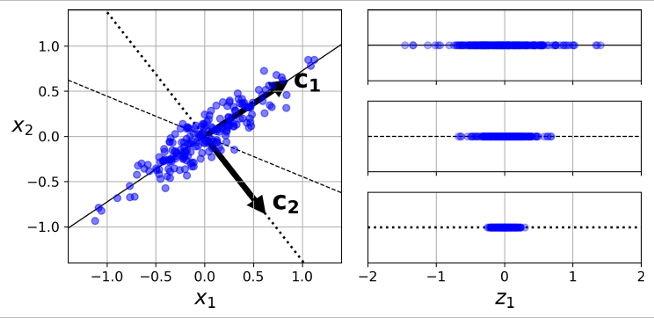

Maksimum miktarda varyansı koruyan ekseni seçmek makul görünüyor, çünkü muhtemelen diğer projeksiyonlardan daha az bilgi kaybedecektir. Bu seçimi haklı çıkarmanın bir başka yolu, bu eksenin orijinal veri seti ile o eksene projeksiyonu arasındaki ortalama kare uzaklığı en aza indiren eksen olmasıdır. Bu, PCA'nın arkasındaki oldukça basit fikirdir.

### Principal Components 

PCA, eğitim setindeki en büyük değişkenlik miktarını açıklayan ekseni belirler. Ustteki sekilde bu, dolu çizgidir. Ayrıca, birinci eksene dik olan ve kalan en büyük değişkenliği açıklayan ikinci bir ekseni bulur. Bu 2 boyutlu örnekte başka bir seçenek yoktur: bu, noktalı çizgidir. Eğer veri seti daha yüksek boyutlu olsaydı, PCA üçüncü bir ekseni, önceki eksenlerin ikisine de dik olan bir ekseni, ardından dördüncü, beşinci ve devamını, yani veri setindeki boyut sayısı kadar ekseni de bulurdu. i'inci eksen, verinin i'inci başlıca bileşeni (PC) olarak adlandırılır. Yukaridaki sekilde, birinci PC, c1 vektörünün üzerinde bulunduğu eksendir ve ikinci PC, c2 vektörünün üzerinde bulunduğu eksendir.

Peki bir eğitim setinin ana bileşenlerini nasıl bulabilirsiniz? Neyse ki, Eğitim seti matrisi X'i üç matrisin çarpımı olan U Σ V⊺, şeklinde ayırabilen ve buna standart bir matris faktörizasyon tekniği olan Tekil Değer Ayrışımı (SVD) vardır; burada V, Aradığımız tüm ana bileşenleri tanımlayan birim vektörleri içerir, altta gösterildiği gibi.

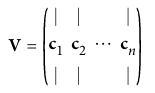

Aşağıdaki Python kodu, eğitim setinin tüm başlıca bileşenlerini elde etmek için NumPy’nin svd() fonksiyonunu kullanır ve ardından ilk iki başlıca bileşeni tanımlayan iki birim vektörü çıkarır.

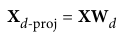

In [ ]:
import numpy as np 
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)

In [75]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [76]:
# X_centered = X - X.mean(axis = 0)
# U, s, Vt = np.linalg.svd(X_centered)
# c1 = Vt.T[:, 0]
# c2 = Vt.T[:, 1]

In [77]:
# W2 = Vt.T[:, : 2]
# X2D = X_centered.dot(W2)

### using scikit-learn

In [78]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [79]:
pca.explained_variance_ratio_

array([0.10184843, 0.0737014 ])

In [80]:
pca = PCA() 
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [81]:
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)

In [82]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [83]:
rnd_pca = PCA(n_components = 154, svd_solver = 'randomized')
X_reduced = rnd_pca.fit_transform(X_train)

In [84]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components = 154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch) 

X_reduced = inc_pca.transform(X_train)

C:\Users\Mustafa Baki\AppData\Roaming\Python\Python313\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


ValueError: n_components=154 must be less or equal to the batch number of samples 70 for the first partial_fit call.

In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 0.04)
X_reduced = rbf_pca.fit_transform(X[:5000])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("kpca", KernelPCA(n_components = 2)),
    ("log_reg", LogisticRegression())
])

param_grid = [{
    "kpca_gamma": np.linspace(0.03, 0.05, 10),
    "kpca_kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv = 3)
grid_search.fit(X[:500], y[:500])

ValueError: Invalid parameter 'kpca_gamma' for estimator Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                ('log_reg', LogisticRegression())]). Valid parameters are: ['memory', 'steps', 'transform_input', 'verbose'].

In [ ]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X[:7000])
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X[:7000], X_preimage)

4381.8778124734445